In [1]:
import os
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
pd.options.mode.copy_on_write = True

In [3]:
basin_mapping_SVAR = {
    'BASIN_NR_1': 'Bottenviken',
    'BASIN_NR_2': 'Norra Kvarken',
    'BASIN_NR_3': 'Bottenhavet',
    'BASIN_NR_4': 'Ålands hav',
    'BASIN_NR_5': 'Skärgårdshavet',
    'BASIN_NR_6': 'Finska viken',
    'BASIN_NR_7': 'Norra Gotlandshavet',
    'BASIN_NR_8': 'Västra Gotlandshavet',
    'BASIN_NR_9': 'Östra Gotlandshavet',
    'BASIN_NR_10': 'Rigabukten',
    'BASIN_NR_11': 'Gdanskbukten',
    'BASIN_NR_12': 'Bornholmshavet & Hanöbukten',
    'BASIN_NR_13': 'Arkonahavet & Södra Öresund',
    'BASIN_NR_14': 'Bälthavet',
    'BASIN_NR_15': 'Öresund',
    'BASIN_NR_16': 'Kattegatt',
    'BASIN_NR_17': 'Skagerrak',
}

In [4]:
basin_mapping_SVAR = {
    1: 'Bottenviken',
    2: 'Norra Kvarken',
    3: 'Bottenhavet',
    4: 'Ålands hav',
    5: 'Skärgårdshavet',
    6: 'Finska viken',
    7: 'Norra Gotlandshavet',
    8: 'Västra Gotlandshavet',
    9: 'Östra Gotlandshavet',
    10: 'Rigabukten',
    11: 'Gdanskbukten',
    12: 'Bornholmshavet & Hanöbukten',
    13: 'Arkonahavet & Södra Öresund',
    14: 'Bälthavet',
    15: 'Öresund',
    16: 'Kattegatt',
    17: 'Skagerrak',
}

In [5]:
def generate_filepaths(directory, pattern='', not_pattern='DUMMY_PATTERN',
                       pattern_list=[], endswith='',
                       only_from_dir=True):
    for path, subdir, fids in os.walk(directory):
        if only_from_dir:
            if path != directory:
                continue
        # Generator function (uses yield) https://docs.python.org/3/glossary.html#term-generator
        for f in fids:
            if pattern in f and not_pattern not in f and f.endswith(endswith):
                if any(pattern_list):
                    for pat in pattern_list:
                        if pat in f:
                            yield os.path.abspath(os.path.join(path, f))
                else:
                    yield os.path.abspath(os.path.join(path, f))

Set up dataframe containing geom definitions for each selected basin and append the total area of the geom in a new area column

In [6]:
areas = gpd.read_file(
        r'c:\Arbetsmapp\Shapefiler\Sub-basins_Baltic_Sea\Havsomr_SVAR_2016_3b.shp'
)
areas = areas.to_crs(epsg=3006)
areas_geometries = areas[['BASIN_NR', 'geometry']]
areas = areas_geometries.dissolve(by='BASIN_NR', as_index=False)
selected_basins = (3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17)
boolean_filter = areas['BASIN_NR'].isin(selected_basins)
areas = areas.loc[boolean_filter, :].reset_index(drop=True)
areas['area'] = areas['geometry'].apply(lambda geom: int(geom.area))

<Axes: >

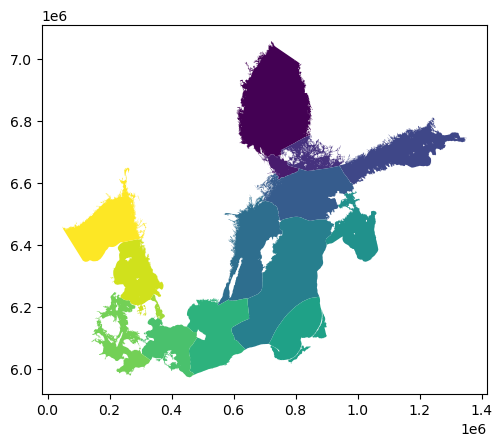

In [7]:
areas.plot('BASIN_NR')

In [8]:
# data_dir = r'C:\Arbetsmapp\BAWS\shp_data'
data_dir = r'C:\Arbetsmapp\BAWS\test_data'

In [9]:
files = generate_filepaths(data_dir, endswith='.shp')
# file_ts = pd.Timestamp(os.path.basename(main_file).split('.')[0].split('_')[-1])

In [10]:
shp_file = data_dir + r'\cyano_daymap_20220815.shp'
gdf = gpd.read_file(shp_file)
sindex = gdf.sindex

In [11]:
file_ts = pd.Timestamp(os.path.basename(shp_file).split('.')[0].split('_')[-1])
print(file_ts)

2022-08-15 00:00:00


In [12]:
blooms = gdf[gdf['class'].isin([2, 3])]
clouds = gdf[gdf['class'].isin([1])]

In [23]:
basin_data = []
selected_basin = []

In [20]:
# Blooms
for n in selected_basins:
    basin_nr = areas['BASIN_NR'].isin([n])
    basin_bloom_overlap = gpd.overlay(blooms, areas[basin_nr], how='intersection')
    basin_data.append(basin_bloom_overlap)
    selected_basin.append(areas[basin_nr])

In [24]:
# Clouds
for n in selected_basins:
    basin_nr = areas['BASIN_NR'].isin([n])
    basin_cloud_overlap = gpd.overlay(clouds, areas[basin_nr], how='intersection')
    basin_data.append(basin_cloud_overlap)
    selected_basin.append(areas[basin_nr])

In [25]:
basin_map = [basin_mapping_SVAR[item] for item in selected_basins]
print(basin_map)

['Bottenhavet', 'Ålands hav', 'Skärgårdshavet', 'Finska viken', 'Norra Gotlandshavet', 'Västra Gotlandshavet', 'Östra Gotlandshavet', 'Rigabukten', 'Gdanskbukten', 'Bornholmshavet & Hanöbukten', 'Arkonahavet & Södra Öresund', 'Bälthavet', 'Öresund', 'Kattegatt', 'Skagerrak']


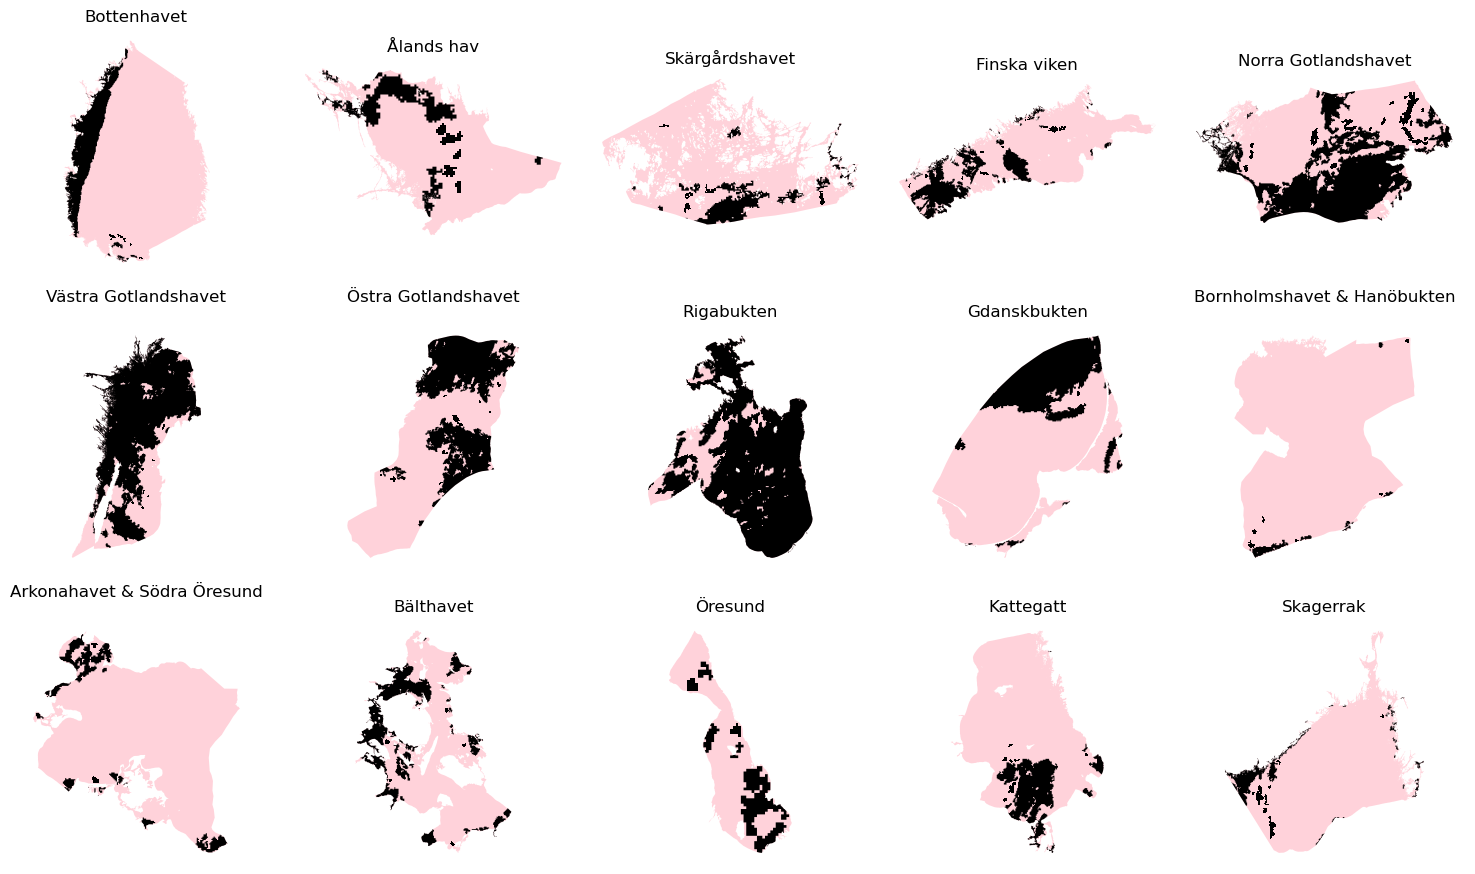

In [26]:
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
axs = axs.flatten()

for ax, basin_name in zip(axs.ravel(), basin_map):
    ax.axis('off')
    ax.set_title(basin_name)
for n, selected_basin in enumerate(selected_basin):
    selected_basin.plot(ax=axs[n], alpha=0.7, color='pink')
for i, basin_data in enumerate(basin_data):
    basin_data.plot(ax=axs[i], color='black')

plt.tight_layout()
plt.show()

C:\Users\k000851\AppData\Local\Temp\ipykernel_15628\4071858494.py:10: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  basin_data.plot(ax=axs[i], color='black')
C:\Users\k000851\AppData\Local\Temp\ipykernel_15628\4071858494.py:10: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  basin_data.plot(ax=axs[i], color='black')
C:\Users\k000851\AppData\Local\Temp\ipykernel_15628\4071858494.py:10: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  basin_data.plot(ax=axs[i], color='black')


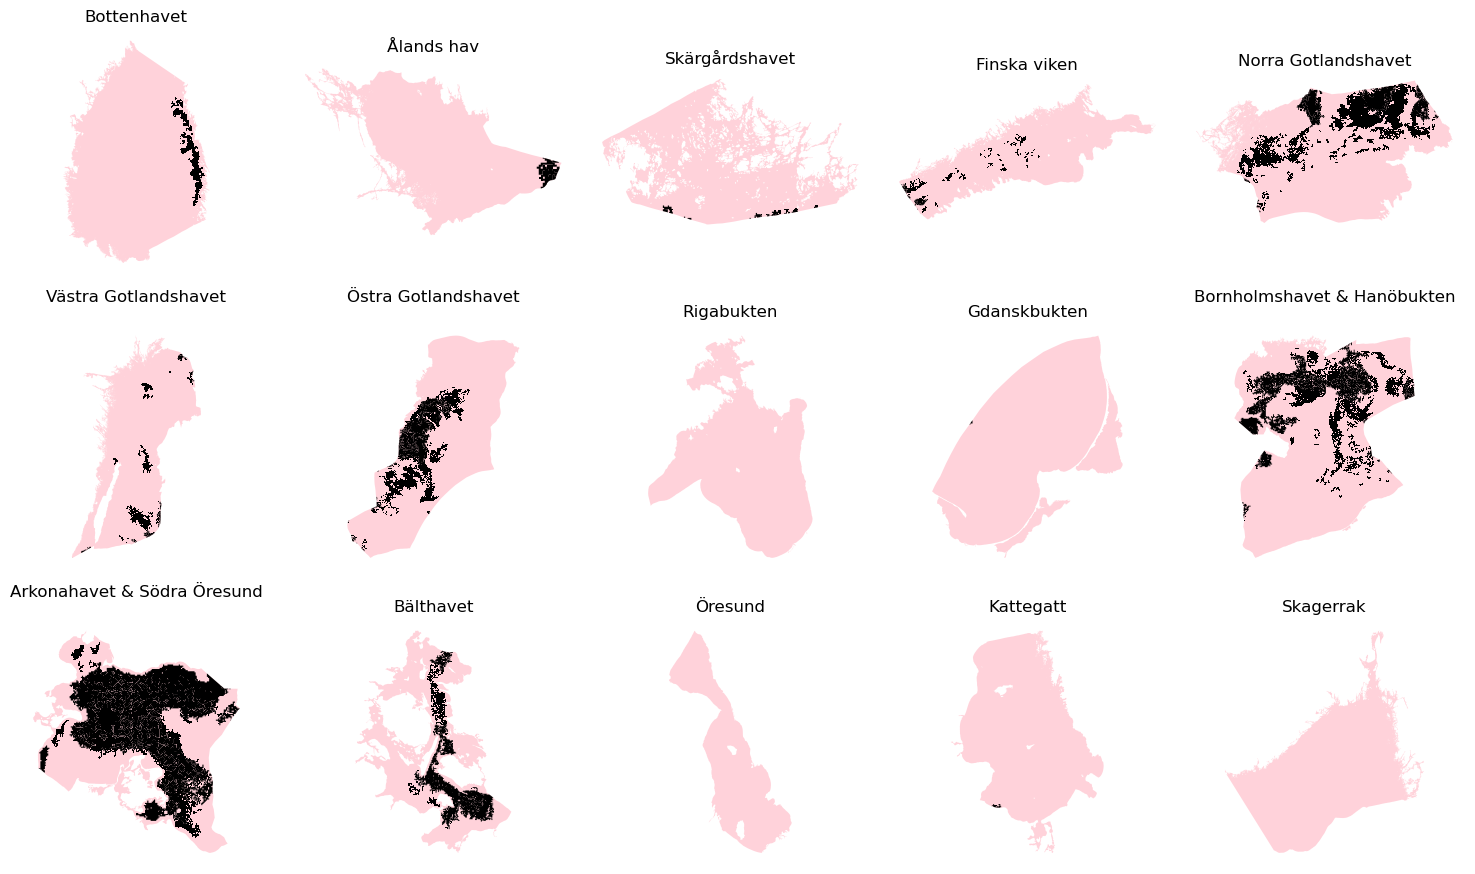

In [ ]:
fig, axs = plt.subplots(3, 5, figsize=(15, 9))
axs = axs.flatten()

for ax, basin_name in zip(axs.ravel(), basin_map):
    ax.axis('off')
    ax.set_title(basin_name)
for n, selected_basin in enumerate(selected_basin):
    selected_basin.plot(ax=axs[n], alpha=0.7, color='pink')
for i, basin_data in enumerate(basin_data):
    basin_data.plot(ax=axs[i], color='black')

plt.tight_layout()
plt.show()

In [42]:
for n in selected_basins:
    basin_nr = areas['BASIN_NR'].isin([n])
    basin_bloom_overlap = gp.overlay(blooms, areas[basin_nr], how='intersection')
    bloom_area_sum = basin_bloom_overlap.area.sum()
    areas.loc[basin_nr, 'bloom_area'] = bloom_area_sum
areas

,BASIN_NR,geometry,area,bloom_area
0,3,"POLYGON ((620922.743 6729219.402, 620757.133 6...",60609721586,2.039821e+09
1,4,"POLYGON ((709486.835 6669336.804, 709413.026 6...",4337600600,8.814282e+07
2,5,"POLYGON ((941642.960 6656019.222, 941484.624 6...",10883952173,1.010615e+08
3,6,"POLYGON ((984634.061 6596697.898, 984670.443 6...",30407673759,1.194335e+09
4,7,"POLYGON ((693957.780 6565996.762, 693875.447 6...",34845257524,8.088755e+09
5,8,"POLYGON ((549687.035 6208329.209, 549711.191 6...",34575748071,1.776576e+09
6,9,"POLYGON ((706381.131 6322005.715, 706379.902 6...",64599679622,1.270830e+10
7,10,"POLYGON ((899983.436 6399829.630, 899925.798 6...",18327887795,0.000000e+00
8,11,"POLYGON ((876400.422 6233011.174, 876417.638 6...",21965530085,4.298355e+06
9,12,"POLYGON ((449029.888 6137863.106, 449177.826 6...",33668211507,7.806345e+09


# Time series

In [146]:
datasets = []

for shapefile in files:
    gdf = gpd.read_file(shapefile)
    
    filename = os.path.basename(shapefile)
    file_ts = pd.Timestamp(os.path.basename(shapefile).split('.')[0].split('_')[-1])
    date = pd.to_datetime(file_ts)
    ds = xr.Dataset.from_dataframe(gdf)

    ds = ds.assign_coords(time=date)

    datasets.append(ds)

ds_all = xr.concat(datasets, dim='time')

In [ ]:
ds_all